# Plotting solutions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [4]:
import os
os.makedirs('plots')

In [5]:
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

## 11

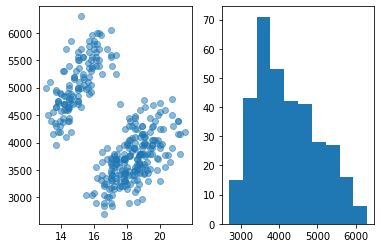

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(penguins['bill_depth_mm'], penguins['body_mass_g'], alpha=0.5)
ax[1].hist(penguins['body_mass_g']);
fig.savefig('plots/ex_11_1.png')

In [7]:
unique_species = penguins['species'].unique()

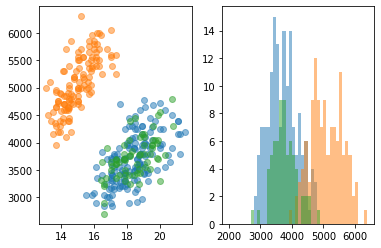

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
for i, s in enumerate(penguins['species'].unique()):
    ax[0].scatter(penguins[penguins['species']==s]['bill_depth_mm'], penguins[penguins['species']==s]['body_mass_g'], alpha = 0.5)
    ax[1].hist(penguins[penguins['species']==s]['body_mass_g'], alpha = 0.5, bins=np.arange(2000,6500,100))

fig.savefig('plots/ex_11_2.png')

## 12

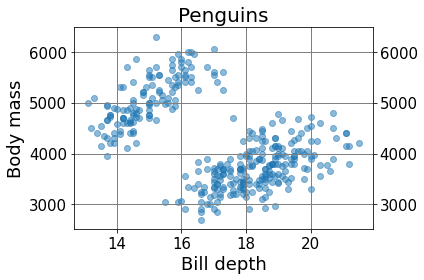

In [9]:
fig, ax = plt.subplots()
ax.scatter(penguins['bill_depth_mm'], penguins['body_mass_g'], alpha=0.5)

ax.set_xlabel('Bill depth', fontdict={'fontsize':18})
ax.set_ylabel('Body mass',fontdict={'fontsize':18})
ax.set_title('Penguins', size=20)
ax.grid(which='major', linewidth=1, color='gray')
ax.tick_params(labelsize=15, right=True, labelright=True)
plt.tight_layout()

fig.savefig('plots/ex_12_1.png')

In [10]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Penguins')

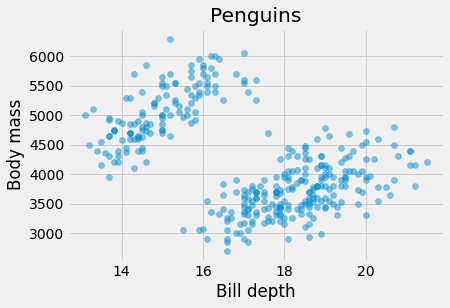

In [11]:
fig, ax = plt.subplots()
ax.scatter(penguins['bill_depth_mm'], penguins['body_mass_g'], alpha=0.5)

ax.set_xlabel('Bill depth')
ax.set_ylabel('Body mass')
ax.set_title('Penguins')

In [12]:
plt.style.use('default')

## 13

In [13]:
sub_df = penguins[penguins['species']=='Gentoo']
sub_df = sub_df.dropna()

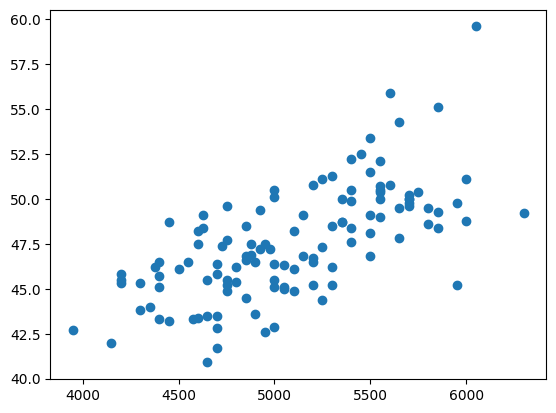

In [14]:
fig, ax = plt.subplots()
ax.scatter(sub_df['body_mass_g'], sub_df['bill_length_mm']);

In [15]:
bins = np.arange(2000, 8000,100)
bin_pos = bins[:-1]+np.diff(bins)/2

bill_mean, _, _ = scipy.stats.binned_statistic(x=sub_df['body_mass_g'],
                                               values=sub_df['bill_length_mm'], statistic='mean', bins=bins)
bill_std, _, _ = scipy.stats.binned_statistic(x=sub_df['body_mass_g'],
                                               values=sub_df['bill_length_mm'], statistic='std', bins=bins)


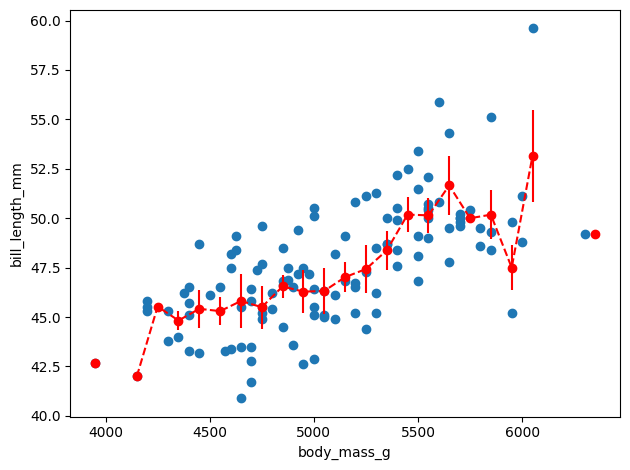

In [16]:
fig, ax = plt.subplots()
ax.scatter(sub_df['body_mass_g'], sub_df['bill_length_mm']);
ax.errorbar(x=bin_pos, y=bill_mean, yerr=bill_std/2, fmt='ro--');
ax.set(xlabel='body_mass_g', ylabel='bill_length_mm')
plt.tight_layout()
fig.savefig('plots/ex_13_1.png')

## 14

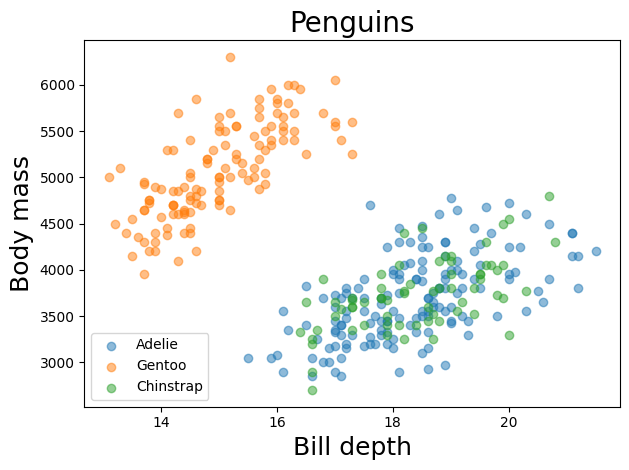

In [17]:
fig, ax = plt.subplots()
for s in penguins['species'].unique():
    ax.scatter(penguins[penguins['species']==s]['bill_depth_mm'],
               penguins[penguins['species']==s]['body_mass_g'], alpha = 0.5, label=s)

ax.set_xlabel('Bill depth', fontdict={'fontsize':18})
ax.set_ylabel('Body mass',fontdict={'fontsize':18})
ax.set_title('Penguins', size=20)
ax.legend(loc='lower left');
plt.tight_layout()
fig.savefig('plots/ex_14_1.png')

## 15

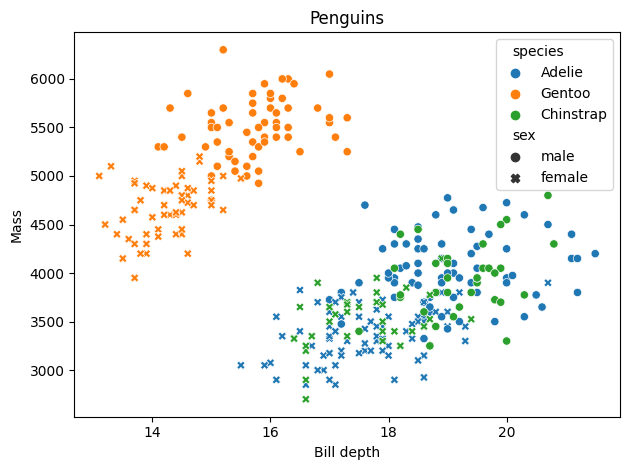

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species', style='sex', ax=ax);
ax.set(title='Penguins', xlabel='Bill depth', ylabel='Mass');
plt.tight_layout()
fig.savefig('plots/ex_15_1.png')

## 16

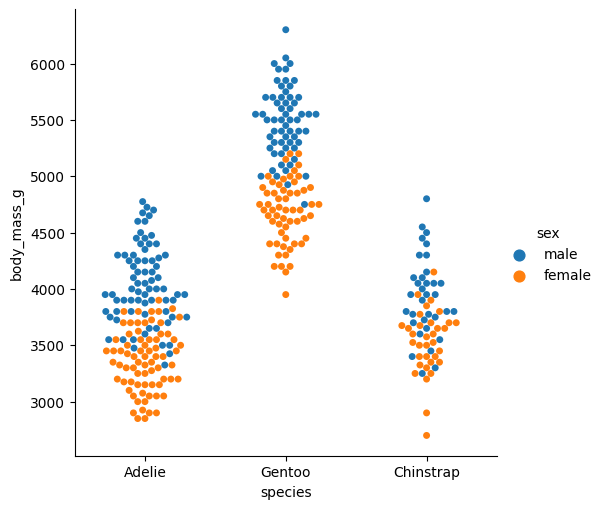

In [27]:
g = sns.catplot(data=penguins, x='species', y='body_mass_g', kind='swarm', hue='sex')
g.fig.savefig('plots/ex_16_1.png')

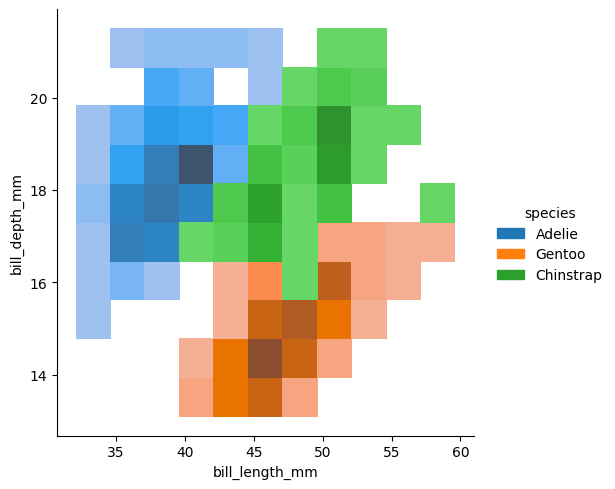

In [32]:
g = sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
g.fig.savefig('plots/ex_16_2.png')

## 17

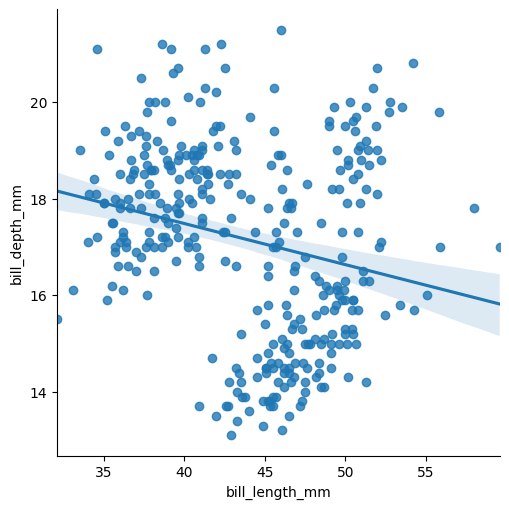

In [36]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm');

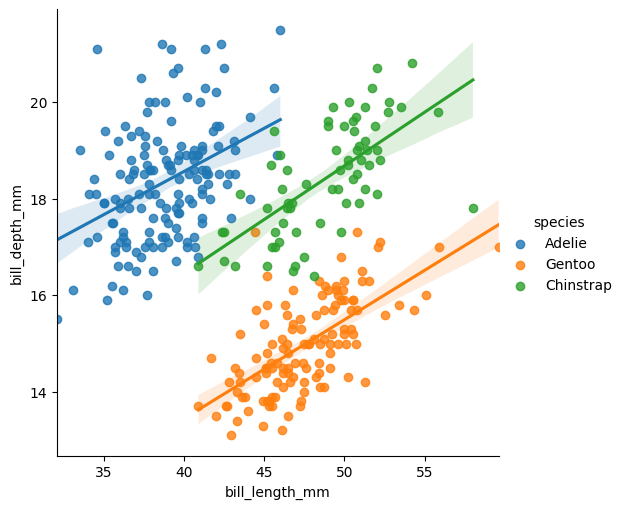

In [37]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species',);